In [17]:
import torch
import numpy as np

In [5]:
torch.empty(1, 2)

tensor([[7.0065e-45, 0.0000e+00]])

In [41]:
torch.rand(3, 3)

tensor([[0.0949, 0.0394, 0.9195],
        [0.7508, 0.6584, 0.4582],
        [0.9770, 0.2864, 0.5772]])

In [42]:
torch.zeros(5, 3, dtype=torch.long)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [68]:
torch.tensor([5.9, 3])

tensor([5.9000, 3.0000])

In [75]:
x = torch.tensor([5.9, 3]).new_ones(4, 3, dtype=torch.double)

In [84]:
x = torch.randn_like(x, dtype=torch.float) 
print(x)

tensor([[-0.2066, -0.5040, -0.4189],
        [-0.6668, -1.1029, -1.2669],
        [-0.0884, -0.8044,  0.7388],
        [ 0.2915, -0.4512,  0.8479]])


In [90]:
torch.rand(4, 3) + x
torch.rand(4, 3).add(x) # the same

# another way

y = torch.rand(4, 3)
torch.add(x, y, out=y)
y

tensor([[ 0.5569, -0.0403,  0.2934],
        [-0.1717, -0.1549, -0.5790],
        [ 0.5355, -0.7782,  0.8378],
        [ 0.4211,  0.2354,  1.0857]])

In [96]:
x[:2]

tensor([[-0.2066, -0.5040, -0.4189],
        [-0.6668, -1.1029, -1.2669]])

In [102]:
# chage shape
x.view(6,2)
x.view(12)

tensor([[-0.2066, -0.5040],
        [-0.4189, -0.6668],
        [-1.1029, -1.2669],
        [-0.0884, -0.8044],
        [ 0.7388,  0.2915],
        [-0.4512,  0.8479]])

In [104]:
torch.cuda.is_available()

False

### Autograd

In [107]:
x = torch.ones(2, 2, requires_grad=True)
x1 = torch.ones(2, 2)
print(x)
print(x1)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[1., 1.],
        [1., 1.]])


In [112]:
(x + 2).grad_fn

In [121]:
x1 = x1 * x1 * 3
x1.requires_grad_(True).grad_fn

In [124]:
x = 1

In [122]:
def save_pickle(file_name, obj):
    import pickle 
    with open("%s.pickle" % file_name, 'wb') as f:
        pickle.dump(obj, f)

def read_pickle(file_name):
    import pickle 
    with open("%s.pickle" % file_name, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [126]:
save_pickle('my_name', x)
y = read_pickle('my_name')

In [128]:
y

1

## Torch tutorial

---

In [2]:
import torch 

x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

print(x*y)

tensor([10.,  3.])


In [3]:
x = torch.zeros([2,5])
y = torch.rand([2,5])
print(y.view([1, 10]))

tensor([[0.5046, 0.5092, 0.9381, 0.6743, 0.9893, 0.3016, 0.4624, 0.6641, 0.5811,
         0.4150]])


## Datasets

In [28]:
import torch 
import torchvision 
from torchvision import transforms, datasets
import numpy as np 
import pandas as pd

In [20]:
train = datasets.MNIST('', train=True, download=True, \
                    transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, \
                    transform=transforms.Compose([transforms.ToTensor()]))

In [60]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [61]:
for i in trainset:
    print(i)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [67]:
x, y  = i[0][0], i[1][0]

In [72]:
df = pd.DataFrame(trainset)

In [104]:
from collections import Counter
_c = Counter(int(i) for ii in list(df[1]) for i in ii) # or i.item()
_c

Counter({6: 5918,
         0: 5923,
         1: 6742,
         8: 5851,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         7: 6265,
         9: 5949})

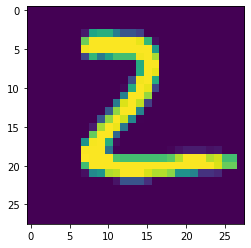

In [71]:
import matplotlib.pyplot as plt

plt.imshow(x.view(28, 28))
plt.show()

In [105]:
import torch.nn as nn 
import torch.nn.functional as F

In [110]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) ## 28*28 image size
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 classes
    
    def forward(self, x): # x data
        x = F.relu(self.fc1(x)) # F - activation function (rule - kind if sigmoid from zero to one)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) # # normalizes values along axis 1 (row (axis=0) or column (axis=1) that sum to 1


In [115]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [118]:
X = torch.rand((28, 28))
X = X.view(1, 28*28)
output = net(X)

In [120]:
output

tensor([[-2.2943, -2.2019, -2.2852, -2.3624, -2.2208, -2.3478, -2.3338, -2.2777,
         -2.3371, -2.3809]], grad_fn=<LogSoftmaxBackward>)

In [138]:
1e-4

0.0001

In [142]:
import torch.optim as optim # to find weights

optimizer = optim.Adam(net.parameters(), lr=1e-3) # net.parameters() what should be optimized; 
# lr - learning rate (size of the step in grad. descent)
epochs = 3
for e in range(epochs):
    for data in trainset: ## some kinf of batching 
        # data is a batch of features and labels 
        X, y = data
        net.zero_grad() # clear grad for every batch
        output = net(X.view(-1, 28*28)) ## pass the data throught the net  (NOTE: -1 should be passed instead of 1) 
        loss = F.nll_loss(output, y) ## loss function (if output not OHE vector use nll_loss, otherwith use Mean Root Squared Error) 
        loss.backward() # backpropagation of loss
        optimizer.step() ## update weights
    print(f'Epoch: {e}, LOSS: {loss}')


Epoch: 0, LOSS: 0.13743475079536438
Epoch: 1, LOSS: 0.006328423973172903
Epoch: 2, LOSS: 0.07568399608135223


In [143]:
loss

tensor(0.0757, grad_fn=<NllLossBackward>)

In [146]:
## evaluation
correct = 0 
total = 0 

# model.train()" and "model.eval()" activates and deactivates Dropout and BatchNorm, so it is quite important. "with torch.no_grad()" only deactivates gradient calculations, but doesn't turn off Dropout and BatchNorm. Your model accuracy will therefore be lower if you don't use model.eval() when evaluating the model.

with torch.no_grad():
    for data in trainset: ### there should be testset 
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total +=1
print(f"Accuracy: {round(correct/total, 2)}")

Accuracy: 0.97


In [150]:
y[idx]

tensor(3)

In [ ]:
paragram_embeddings = np.random.randn(120000,300)
glove_embeddings = np.random.randn(120000,300)
embedding_matrix = np.mean([glove_embeddings, paragram_embeddings], axis=0)

In [1]:
import pickle 
with open('fin.pickle', 'rb') as f: 
    df = pickle.load(f)

In [2]:
df.head()

,score,_class,text,0,1,2,3,4,5,6,...,290,291,292,293,294,295,296,297,298,299
0,4703706.0.8690,STUPEFY,we watched his inglorious withdrawal together ...,0.008347,-0.053040,-0.230350,0.006090,0.023212,-0.035828,0.000337,...,0.038344,-0.098733,-0.002843,-0.103207,-0.033448,0.172728,-0.035697,0.060077,-0.010933,0.068320
1,4593427.0.1815,ACCIO,"my wand , `` incendio . '' this wretched chill...",0.000724,-0.053348,-0.198696,0.017975,0.021162,-0.006253,-0.000227,...,0.030515,-0.095899,0.026130,-0.079410,-0.025872,0.215718,-0.050384,0.093738,-0.007752,0.102257
2,4278446.0.2692,EXPELLIARMUS,"already compared ours , they 're the same ever...",0.013692,-0.106544,-0.247722,0.004252,-0.032518,-0.045397,0.016788,...,0.015337,-0.073834,0.011775,-0.069102,-0.051675,0.215375,-0.026393,0.053807,-0.033142,0.150730
3,9507233.0.61523,PROTEGO,"his wounds were removed . `` do n't worry , do...",0.070034,-0.135037,-0.195022,-0.029645,0.003196,-0.012578,0.040316,...,-0.076753,-0.125019,-0.002307,-0.077470,-0.041777,0.207217,-0.011403,0.128364,0.013500,0.162325
4,11351772.0.14504,LUMOS,"would he care ? and harry vanished , refusing ...",-0.007617,-0.070526,-0.245650,-0.005221,-0.001592,-0.019080,0.003828,...,0.054683,-0.088570,0.006394,-0.092155,-0.021292,0.165983,-0.008104,0.064210,-0.011174,0.099386


In [ ]:
class CNN_Text(nn.Module):
    
    def __init__(self):
        super().__init__()
        filter_sizes = [1,2,3,5]
        num_filters = 36
        self.embedding = nn.Embedding(max_features, embed_size)
        self.embedding.weight = nn.Parameter(torch.tensor(embedding_matrix, dtype=torch.float32))
        self.embedding.weight.requires_grad = False
        self.convs1 = nn.ModuleList([nn.Conv2d(1, num_filters, (K, embed_size)) for K in filter_sizes])
        self.dropout = nn.Dropout(0.1)
        self.fc1 = nn.Linear(len(Ks)*num_filters, 1)


    def forward(self, x):
        x = self.embedding(x)  
        x = x.unsqueeze(1)  
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1] 
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  
        x = torch.cat(x, 1)
        x = self.dropout(x)  
        logit = self.fc1(x)  
        return logit